## We will now start coding in python! We are going to load our counts data from featureCounts and do some calculations

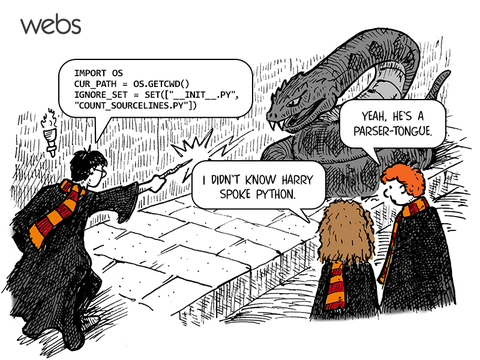

### Do you have everything installed?

First we need to import all the python packages that we will use. We will do that in the following cell. WARNING, if you didn't finish your installations you most likely won't have all these packages installed. If you get the error "Cannot import package name ...." You need to go back to your command line and install it on tscc.

To install missing packages follow the instructions on the [installations](https://github.com/jvtalwar/2021-MSTP-Bioinformatics-Bootcamp/tree/master/Day_0_Setup/Installations) page. Once you have installed it on your command line on tscc, you will need to restart your kernel to refresh those changes (Kernel - Restart)


NOTE - since these are python specific packages, you will not be able to tell if they installed properly on your command line with

`which packagename`

Instead, you will first need to open python in your terminal with:

`python`

Then try to import it (this is the same thing you do in a Jupyter notebook)

`import packagename`

If you don't get any errors, then success! It is installed. To get out of python and back to your normal command line:

`quit()`

## Process data

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# This notebook is linked to TSCC, so we can load data directly by providing 
# the full path of the file location on tscc. Change the directory below to match your path
directory = '~/scratch/featureCounts/'

In [4]:
# We are going to load the featurecounts file and assign it to the variable name: counts
# change the file name to match the filename you used in your featureCounts script
counts = pd.read_csv(directory+"hangauer.results.counts",sep="\t",index_col=0,
                    comment="#")
print(counts.shape)
counts.head()

(57820, 10)


,Chr,Start,End,Strand,Length,/home/ucsd-train58/scratch/testing/star_alignment/DMSO_1_ATCACGAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DMSO_2_CGATGTAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_1_CAGATCAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_2_CCGTCCAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_3_GTGAAAAligned.out.sorted.bam
Geneid,,,,,,,,,,
ENSG00000223972.4,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,11869;11872;11874;12010;12179;12595;12613;1261...,12227;12227;12227;12057;12227;12721;12697;1272...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,1756,0,0,0,0,0
ENSG00000227232.4,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,14363;14363;14363;14404;14411;14970;14970;1497...,14829;14829;14829;14501;14502;15038;15038;1503...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,2073,16,19,44,38,61
ENSG00000243485.2,chr1;chr1;chr1;chr1;chr1;chr1,29554;30267;30366;30564;30976;30976,30039;30667;30503;30667;31109;31097,+;+;+;+;+;+,1021,0,0,0,0,0
ENSG00000237613.2,chr1;chr1;chr1;chr1;chr1,34554;35245;35277;35721;35721,35174;35481;35481;36081;36073,-;-;-;-;-,1219,0,0,0,0,0
ENSG00000268020.2,chr1;chr1;chr1,52473;53049;54830,53312;53067;54936,+;+;+,947,0,0,0,0,0


In [5]:
#Let's drop unnecessary columns

#Look at the column names in your dataframe above, we only want to keep Length and the four files
#containing the count information. Make sure the names that you have after drop below match the 
#column names that you want to eliminate

counts = counts.drop(['Chr','Start','End','Strand'], axis=1)
counts.head()

,Length,/home/ucsd-train58/scratch/testing/star_alignment/DMSO_1_ATCACGAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DMSO_2_CGATGTAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_1_CAGATCAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_2_CCGTCCAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_3_GTGAAAAligned.out.sorted.bam
Geneid,,,,,,
ENSG00000223972.4,1756,0,0,0,0,0
ENSG00000227232.4,2073,16,19,44,38,61
ENSG00000243485.2,1021,0,0,0,0,0
ENSG00000237613.2,1219,0,0,0,0,0
ENSG00000268020.2,947,0,0,0,0,0


#### Let's extract and save the necessary information we need for DEseq2:

Let's remove superflous information (e.g., if you have nonsorted bams in your dataframe):

In [6]:
cols=[x for x in counts.columns if "sorted" in x]

In [8]:
deseq2=counts.loc[:,cols]
deseq2.head()

,/home/ucsd-train58/scratch/testing/star_alignment/DMSO_1_ATCACGAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DMSO_2_CGATGTAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_1_CAGATCAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_2_CCGTCCAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_3_GTGAAAAligned.out.sorted.bam
Geneid,,,,,
ENSG00000223972.4,0,0,0,0,0
ENSG00000227232.4,16,19,44,38,61
ENSG00000243485.2,0,0,0,0,0
ENSG00000237613.2,0,0,0,0,0
ENSG00000268020.2,0,0,0,0,0


In [9]:
#We will save this counts matrix to use as the input for differential expression. 
#This will be saved in the directory called counts and will have the filename 
#counts_for_deseq2.csv
deseq2.to_csv(directory+'counts_for_deseq2.csv')

## Convert to RPKM

In [13]:
counts.sum()

Length                                                                                   126319986
/home/ucsd-train58/scratch/testing/star_alignment/DMSO_1_ATCACGAligned.out.sorted.bam     46774355
/home/ucsd-train58/scratch/testing/star_alignment/DMSO_2_CGATGTAligned.out.sorted.bam     46806354
/home/ucsd-train58/scratch/testing/star_alignment/DTP_1_CAGATCAligned.out.sorted.bam      42967808
/home/ucsd-train58/scratch/testing/star_alignment/DTP_2_CCGTCCAligned.out.sorted.bam      47191723
/home/ucsd-train58/scratch/testing/star_alignment/DTP_3_GTGAAAAligned.out.sorted.bam      43478541
dtype: int64

In [14]:
#Here is a handy function that will turn our counts matrix into RPKM

#You don't need to do anything here other than run the cell

def counts_to_rpkm(featureCountsTable):
    counts = featureCountsTable.iloc[:,1:] #extract the dataframe independent of lengths
    lengths = featureCountsTable['Length'] #get the gene lengths --> i.e., the thing we dropped above
    mapped_reads = counts.sum() 
    return (counts * pow(10,9)).div(mapped_reads, axis=1).div(lengths, axis=0) #RPKM --> correct for gene length and library coverage

In [15]:
rpkm = counts_to_rpkm(counts)
print(rpkm.shape)
rpkm.head()

(57820, 5)


,/home/ucsd-train58/scratch/testing/star_alignment/DMSO_1_ATCACGAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DMSO_2_CGATGTAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_1_CAGATCAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_2_CCGTCCAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_3_GTGAAAAligned.out.sorted.bam
Geneid,,,,,
ENSG00000223972.4,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000227232.4,0.165011,0.195817,0.493981,0.388435,0.676793
ENSG00000243485.2,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000237613.2,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000268020.2,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
#To get rid of a lot of noise, we are going to drop rows that have RPKM less than 4
rpkm_filtered = rpkm.loc[rpkm.sum(axis=1) > 4]
print(rpkm_filtered.shape)
rpkm_filtered.head()

(13331, 5)


,/home/ucsd-train58/scratch/testing/star_alignment/DMSO_1_ATCACGAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DMSO_2_CGATGTAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_1_CAGATCAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_2_CCGTCCAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_3_GTGAAAAligned.out.sorted.bam
Geneid,,,,,
ENSG00000225972.1,3.563206,3.331043,2.377374,2.335474,2.163965
ENSG00000225630.1,1.883994,1.412030,1.515881,1.258419,1.321831
ENSG00000237973.1,25.494359,22.693852,37.692690,41.171801,34.864973
ENSG00000229344.1,7.805616,7.549668,9.759745,10.377584,8.734548
ENSG00000240409.1,0.929532,1.857793,1.124311,1.023679,1.444435


In [22]:
#Now we will save the file. Note that it will go to the same location we defined as 
#directory above and it will be given the filename rpkm_filtered.csv
rpkm_filtered.to_csv(directory+"rpkm_filtered.csv")

### What does our data look like?

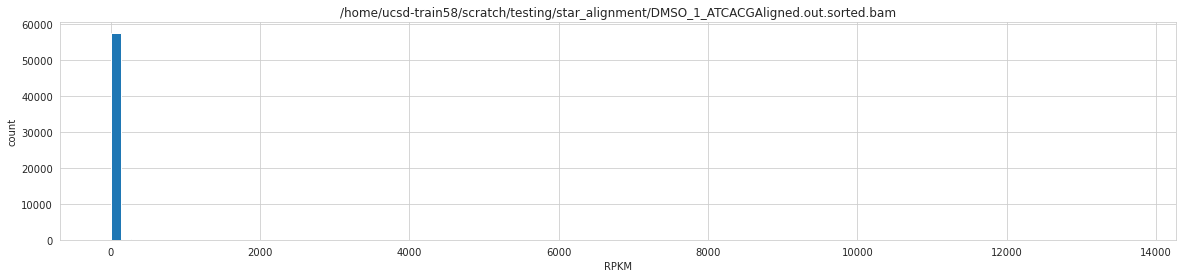

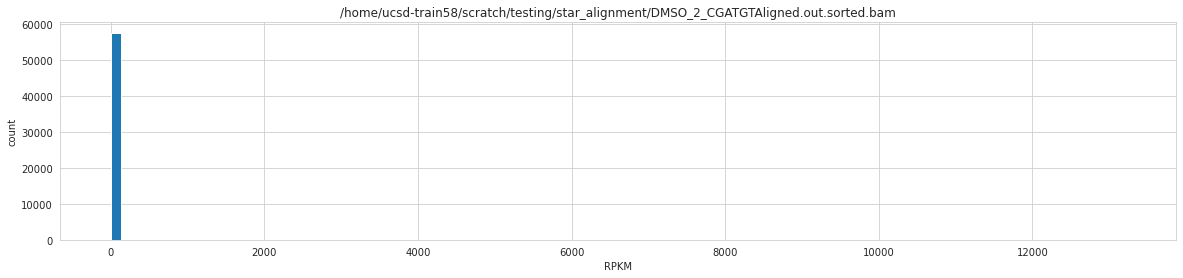

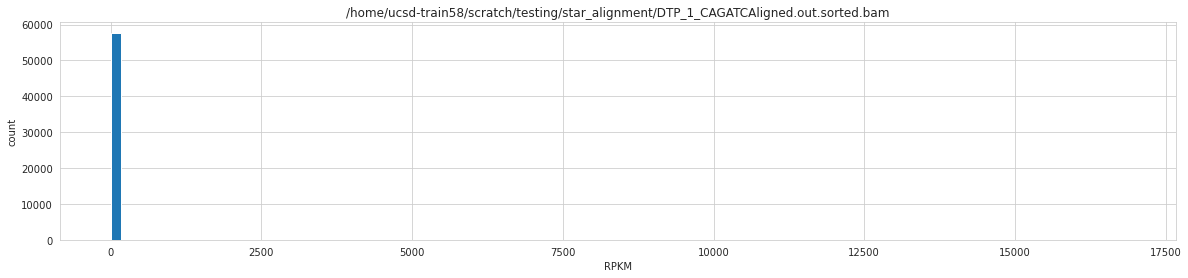

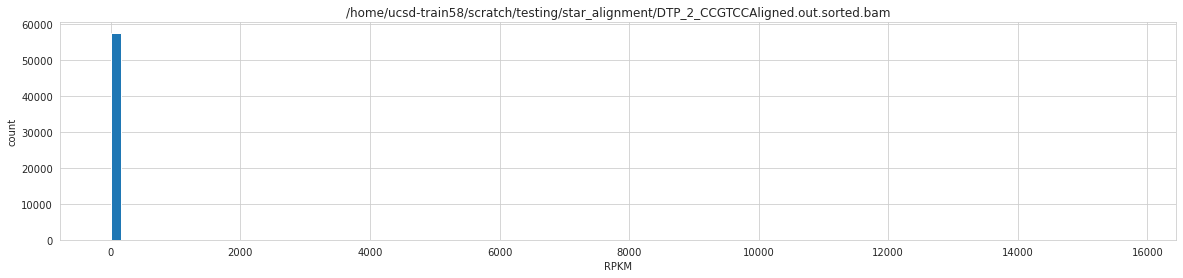

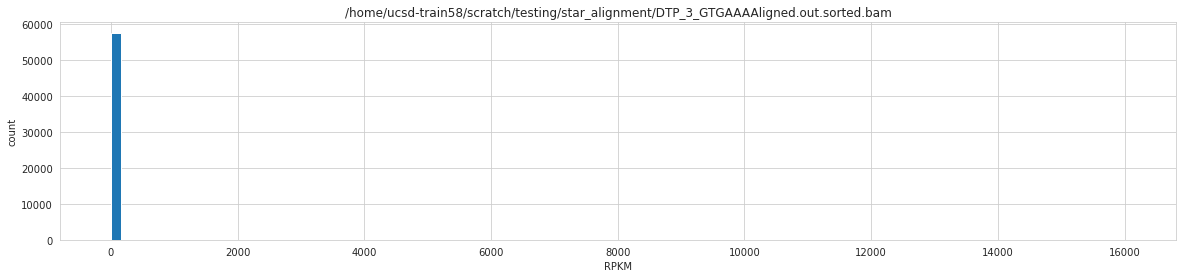

In [26]:
#Let's look at a histogram of the rpkm values for each sample.
sns.set_style("whitegrid")
for i in rpkm.columns:
    plt.figure(figsize=(20,4))
    plt.hist(rpkm[i], bins=100)
    plt.xlabel("RPKM")
    plt.ylabel("count")
    plt.title(i)


Notice how the vast majority cluster near zero? Let's transform our data to a log2 scale for better viewing.

In [28]:
#Now let's take the log2RPKM. We will include a pseudocount to prevent inf values (i.e. log 0 == -inf /or undefined..)
rpkm_filtered +=1
rpkm_log2 = np.log2(rpkm_filtered)
print(rpkm_log2.shape)
rpkm_log2.head()

(13331, 5)


,/home/ucsd-train58/scratch/testing/star_alignment/DMSO_1_ATCACGAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DMSO_2_CGATGTAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_1_CAGATCAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_2_CCGTCCAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_3_GTGAAAAligned.out.sorted.bam
Geneid,,,,,
ENSG00000225972.1,2.190048,2.114715,1.755902,1.737892,1.661733
ENSG00000225630.1,1.528068,1.270248,1.331064,1.175313,1.215263
ENSG00000237973.1,4.727613,4.566441,5.273989,5.398207,5.164504
ENSG00000229344.1,3.138424,3.095868,3.427572,3.508122,3.283114
ENSG00000240409.1,0.948251,1.514901,1.086995,1.016981,1.289501


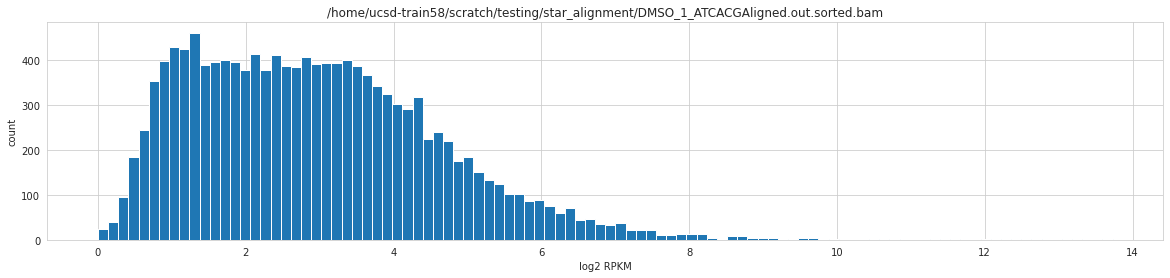

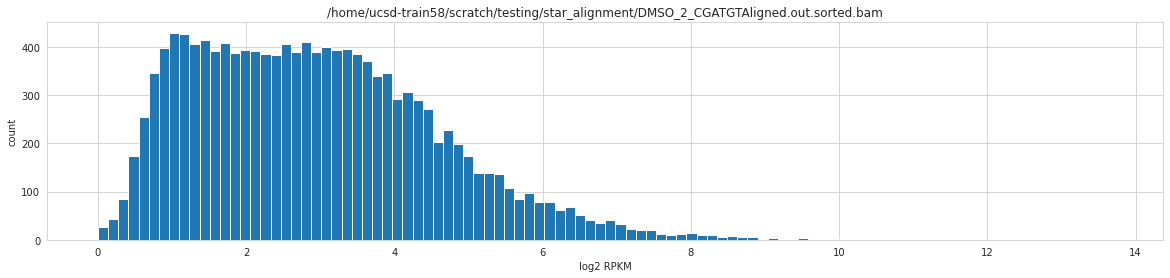

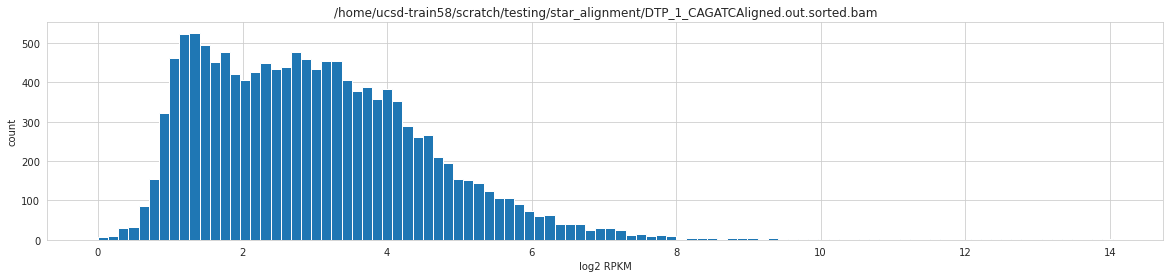

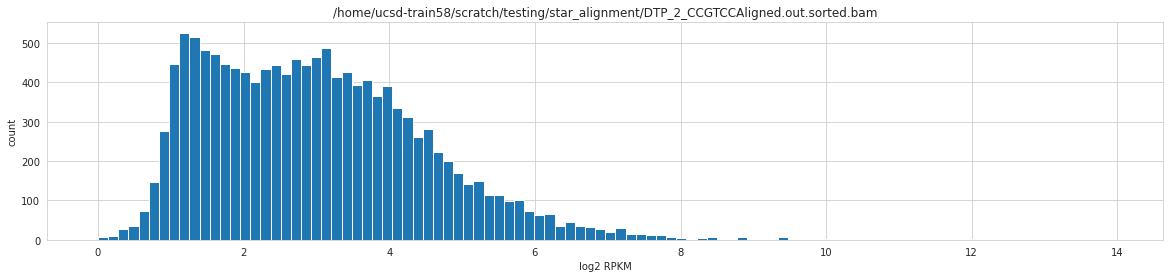

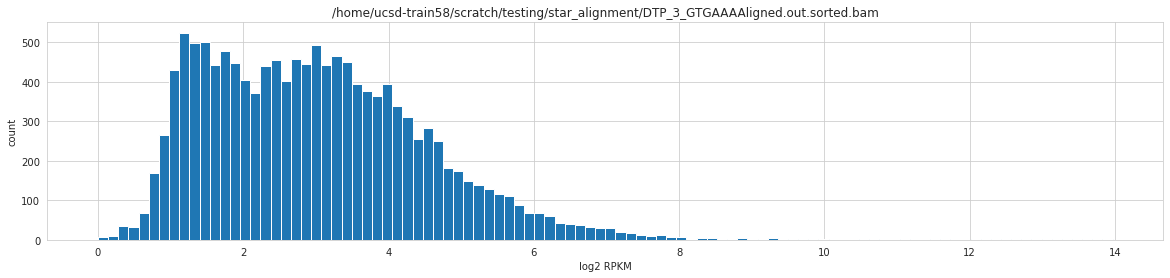

In [29]:
sns.set_style("whitegrid")
for i in rpkm_log2.columns:
    plt.figure(figsize=(20,4))
    plt.hist(rpkm_log2[i], bins=100)
    plt.xlabel("log2 RPKM")
    plt.ylabel("count")
    plt.title(i)




Let's filter again to remove rows where the average log2RPKM < 0

In [30]:
rpkm_log2_filtered = rpkm_log2.loc[rpkm_log2.mean(axis=1) > 0]
print(rpkm_log2_filtered.shape)
rpkm_log2_filtered.head()

(13331, 5)


,/home/ucsd-train58/scratch/testing/star_alignment/DMSO_1_ATCACGAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DMSO_2_CGATGTAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_1_CAGATCAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_2_CCGTCCAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_3_GTGAAAAligned.out.sorted.bam
Geneid,,,,,
ENSG00000225972.1,2.190048,2.114715,1.755902,1.737892,1.661733
ENSG00000225630.1,1.528068,1.270248,1.331064,1.175313,1.215263
ENSG00000237973.1,4.727613,4.566441,5.273989,5.398207,5.164504
ENSG00000229344.1,3.138424,3.095868,3.427572,3.508122,3.283114
ENSG00000240409.1,0.948251,1.514901,1.086995,1.016981,1.289501


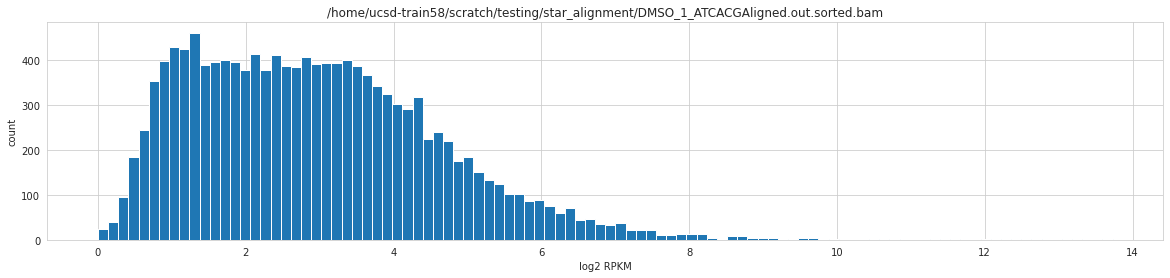

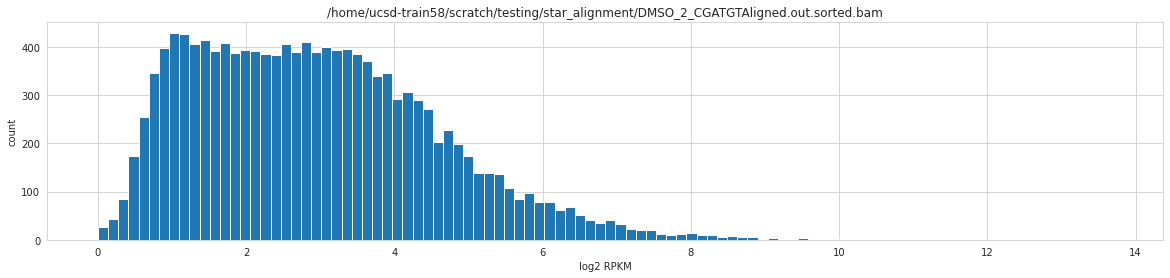

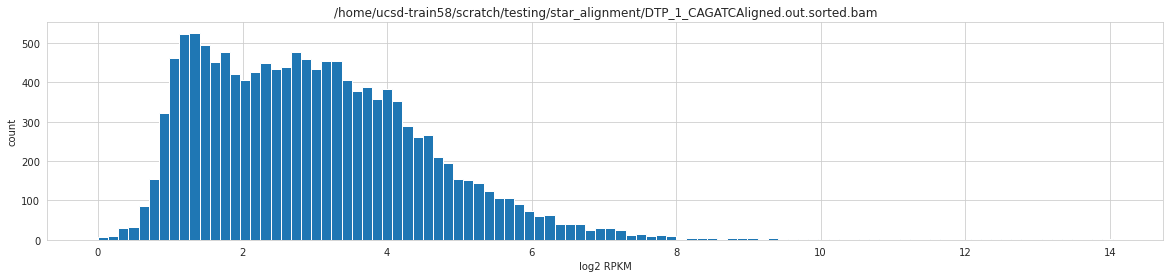

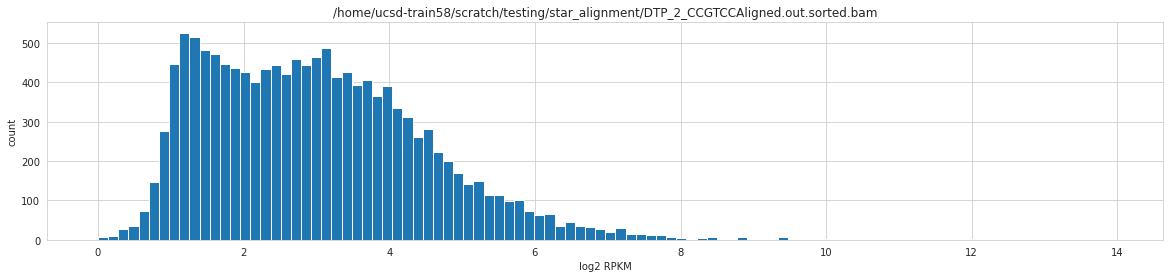

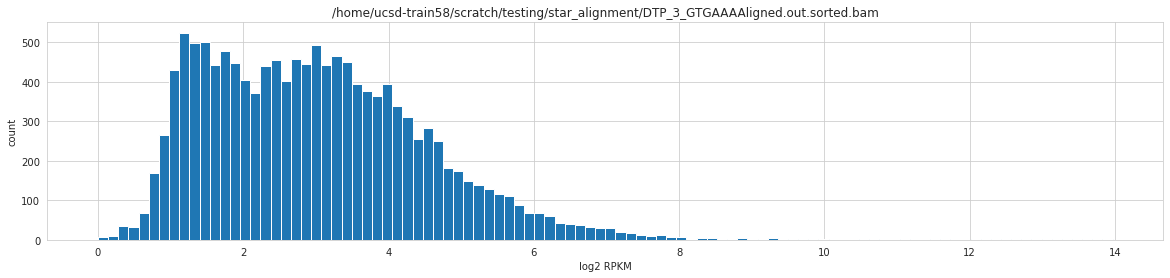

In [31]:
sns.set_style("whitegrid")
for i in rpkm_log2_filtered.columns:
    plt.figure(figsize=(20,4))
    plt.hist(rpkm_log2_filtered[i], bins=100)
    plt.xlabel("log2 RPKM")
    plt.ylabel("count")
    plt.title(i)

Now we will save the file. Note that it will go to the same location we defined as directory above and it will be given the filename **rpkm_log2_filtered.csv**

In [32]:
rpkm_log2_filtered.to_csv(directory+"rpkm_log2_filtered.csv")

### Sanity/Quality Check:

A good quality metric is to see how similar your samples are. We can see how similar our replicates are by doing a spearman correlation with transcriptome values and plot a clustermap to visualize how similar samples are

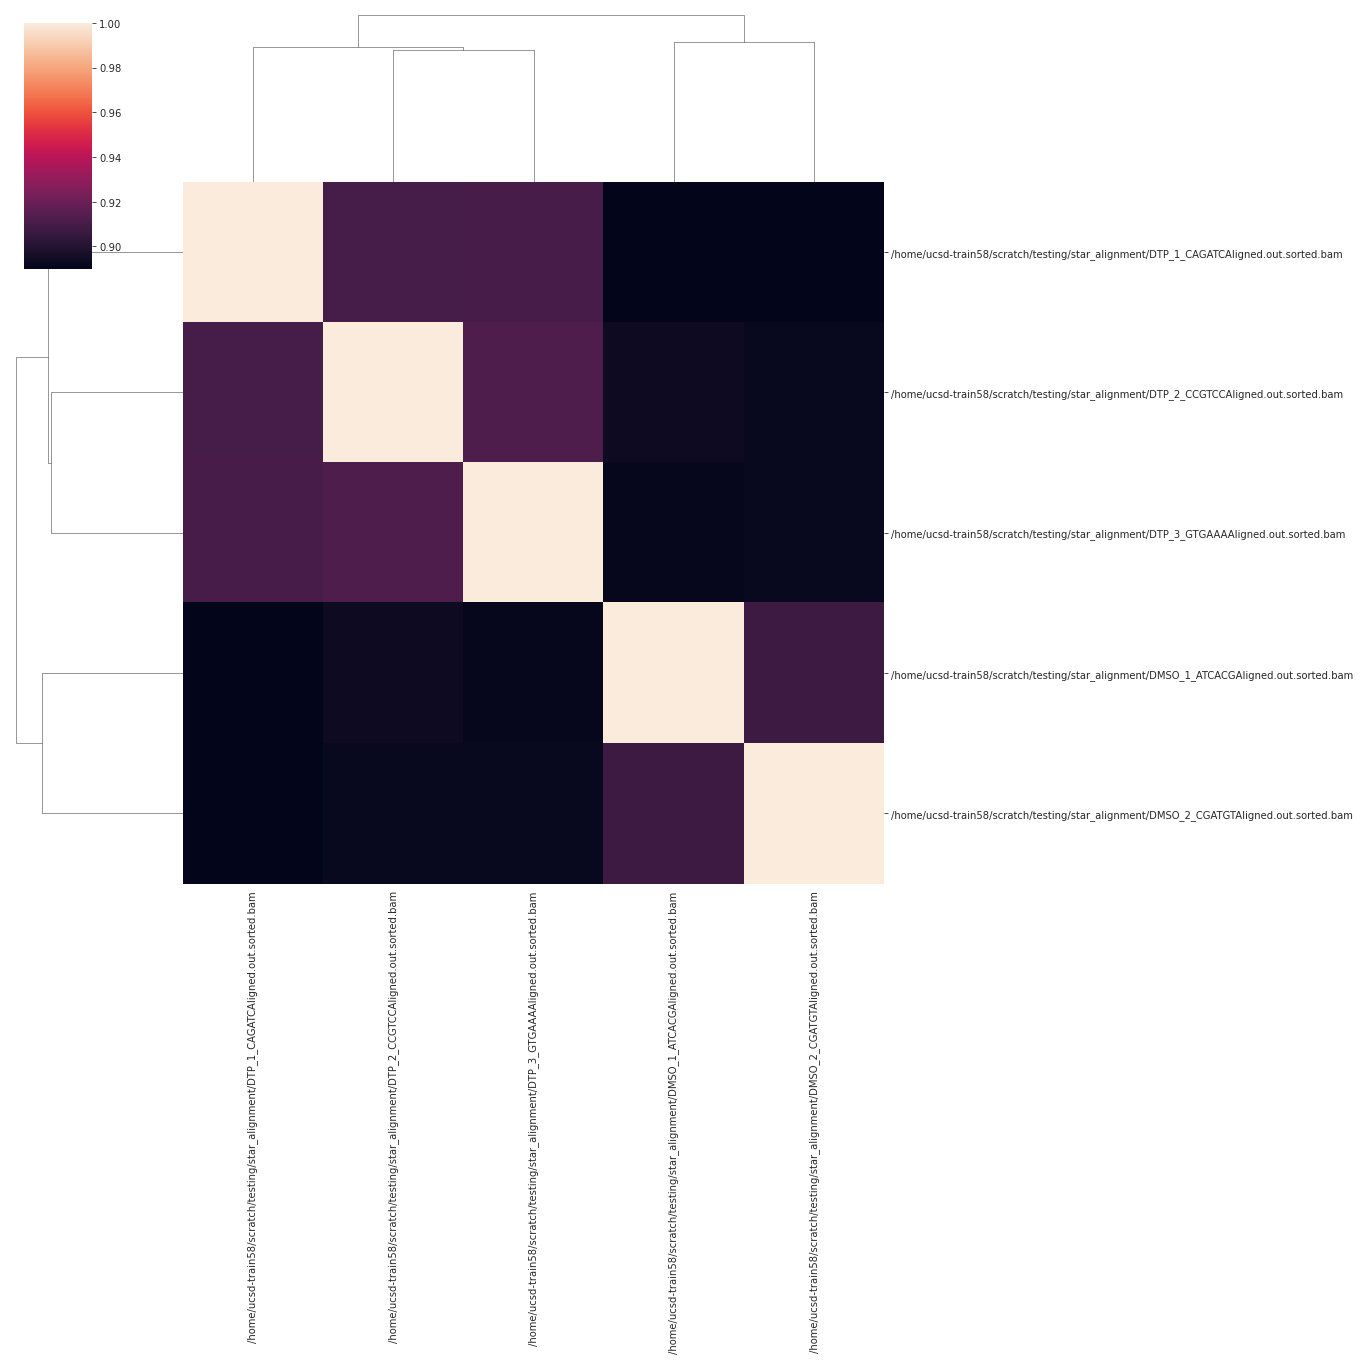

In [38]:
sns.clustermap(rpkm.corr(method='spearman'), figsize = (19,19))

Great it looks as if our DTP and DMSO samples are different according to the correlation (and samples of the same type are correlated with one another). For visialzation purposes to illustrate this point, let's change the range of the heatbar. Differences through this should appear more marked.

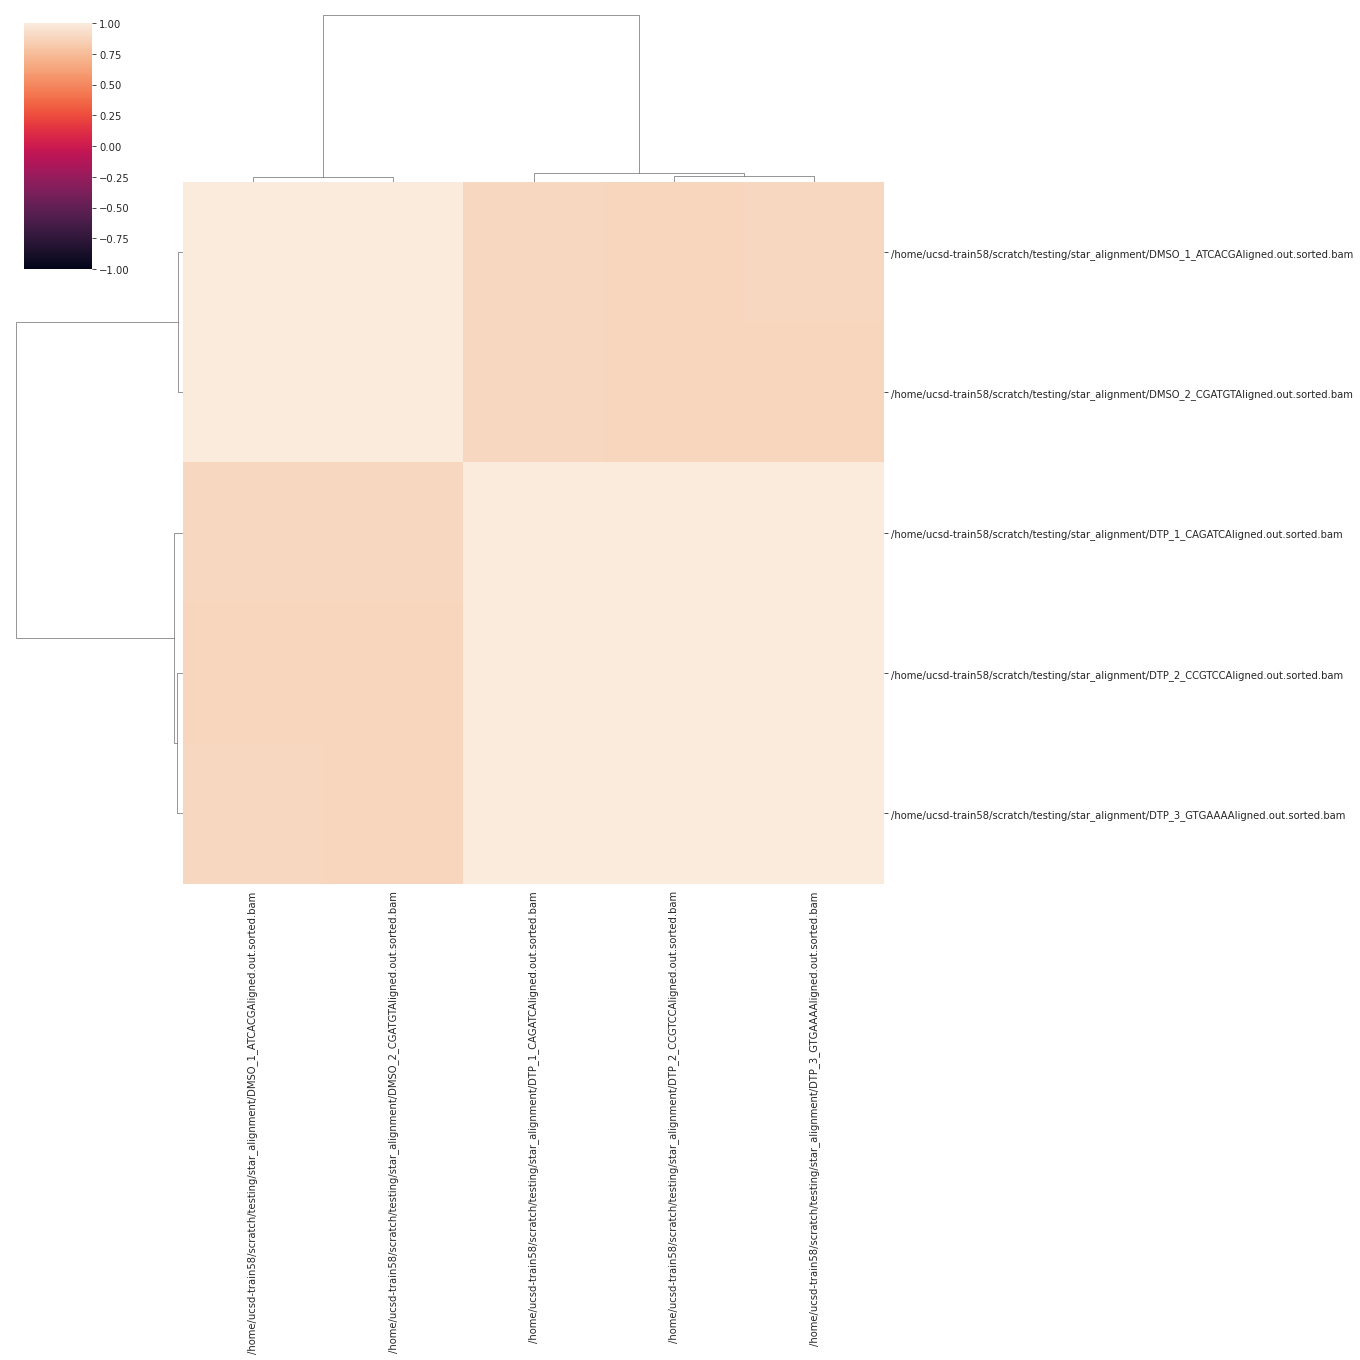

In [41]:
sns.clustermap(rpkm_filtered.corr(method='spearman'),vmin=-1,vmax=1, figsize = (19,19))

Great we see the differences by sample type again as expected!